In [9]:
import ezc3d
walk_1 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Walk-001/pose_filt_0.c3d")
walk_2 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Walk-002/pose_filt_0.c3d")
hop_single = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/HopSingle-001/pose_filt_0.c3d")
cmj_1 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/CMJ-001/pose_filt_0.c3d")
cmj_2 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/CMJ-002/pose_filt_0.c3d")
cmj_3 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/CMJ-003/pose_filt_0.c3d")
triple_hop_1 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/HopTriple-001/pose_filt_0.c3d")
triple_hop_2 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/HopTriple-002/pose_filt_0.c3d")
pistol_1 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Pistol-001/pose_filt_0.c3d")
pistol_2 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Pistol-002/pose_filt_0.c3d")
squat_1 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Squat001/pose_filt_0.c3d")
squat_2 = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Squat001-000/pose_filt_0.c3d")
jog = ezc3d.c3d("/Users/harrietdray/Biodynamics/Harriet_c3d/Jog-001/pose_filt_0.c3d")



import matplotlib.pyplot as plt

labels = squat_2['parameters']['POINT']['LABELS']['value'] # List of angle names

🎯 STARTING COMPREHENSIVE ANALYSIS OF ALL FILES
🚀 PROCESSING ALL C3D FILES
📄 Processing Walk-002 (walking)
   ✅ Extracted 18 features
📄 Processing HopSingle-001 (single_hop)
   ✅ Extracted 18 features
📄 Processing CMJ-003 (counter_movement_jump)
   ✅ Extracted 18 features
📄 Processing HopTriple-002 (triple_hop)
   ✅ Extracted 18 features
📄 Processing Pistol-001 (pistol_squat)
   ✅ Extracted 18 features
📄 Processing Pistol-002 (pistol_squat)
   ✅ Extracted 18 features
📄 Processing Squat001-000 (squat)
   ✅ Extracted 18 features
📄 Processing Jog-001 (jogging)
   ✅ Extracted 18 features

✅ COMPLETE! Created dataset with 8 samples and 18 features
Movement types: {'pistol_squat': 2, 'walking': 1, 'single_hop': 1, 'counter_movement_jump': 1, 'triple_hop': 1, 'squat': 1, 'jogging': 1}

🔬 RUNNING UNSUPERVISED ANALYSIS
✅ Found 4 movement clusters

📊 CREATING VISUALIZATIONS...


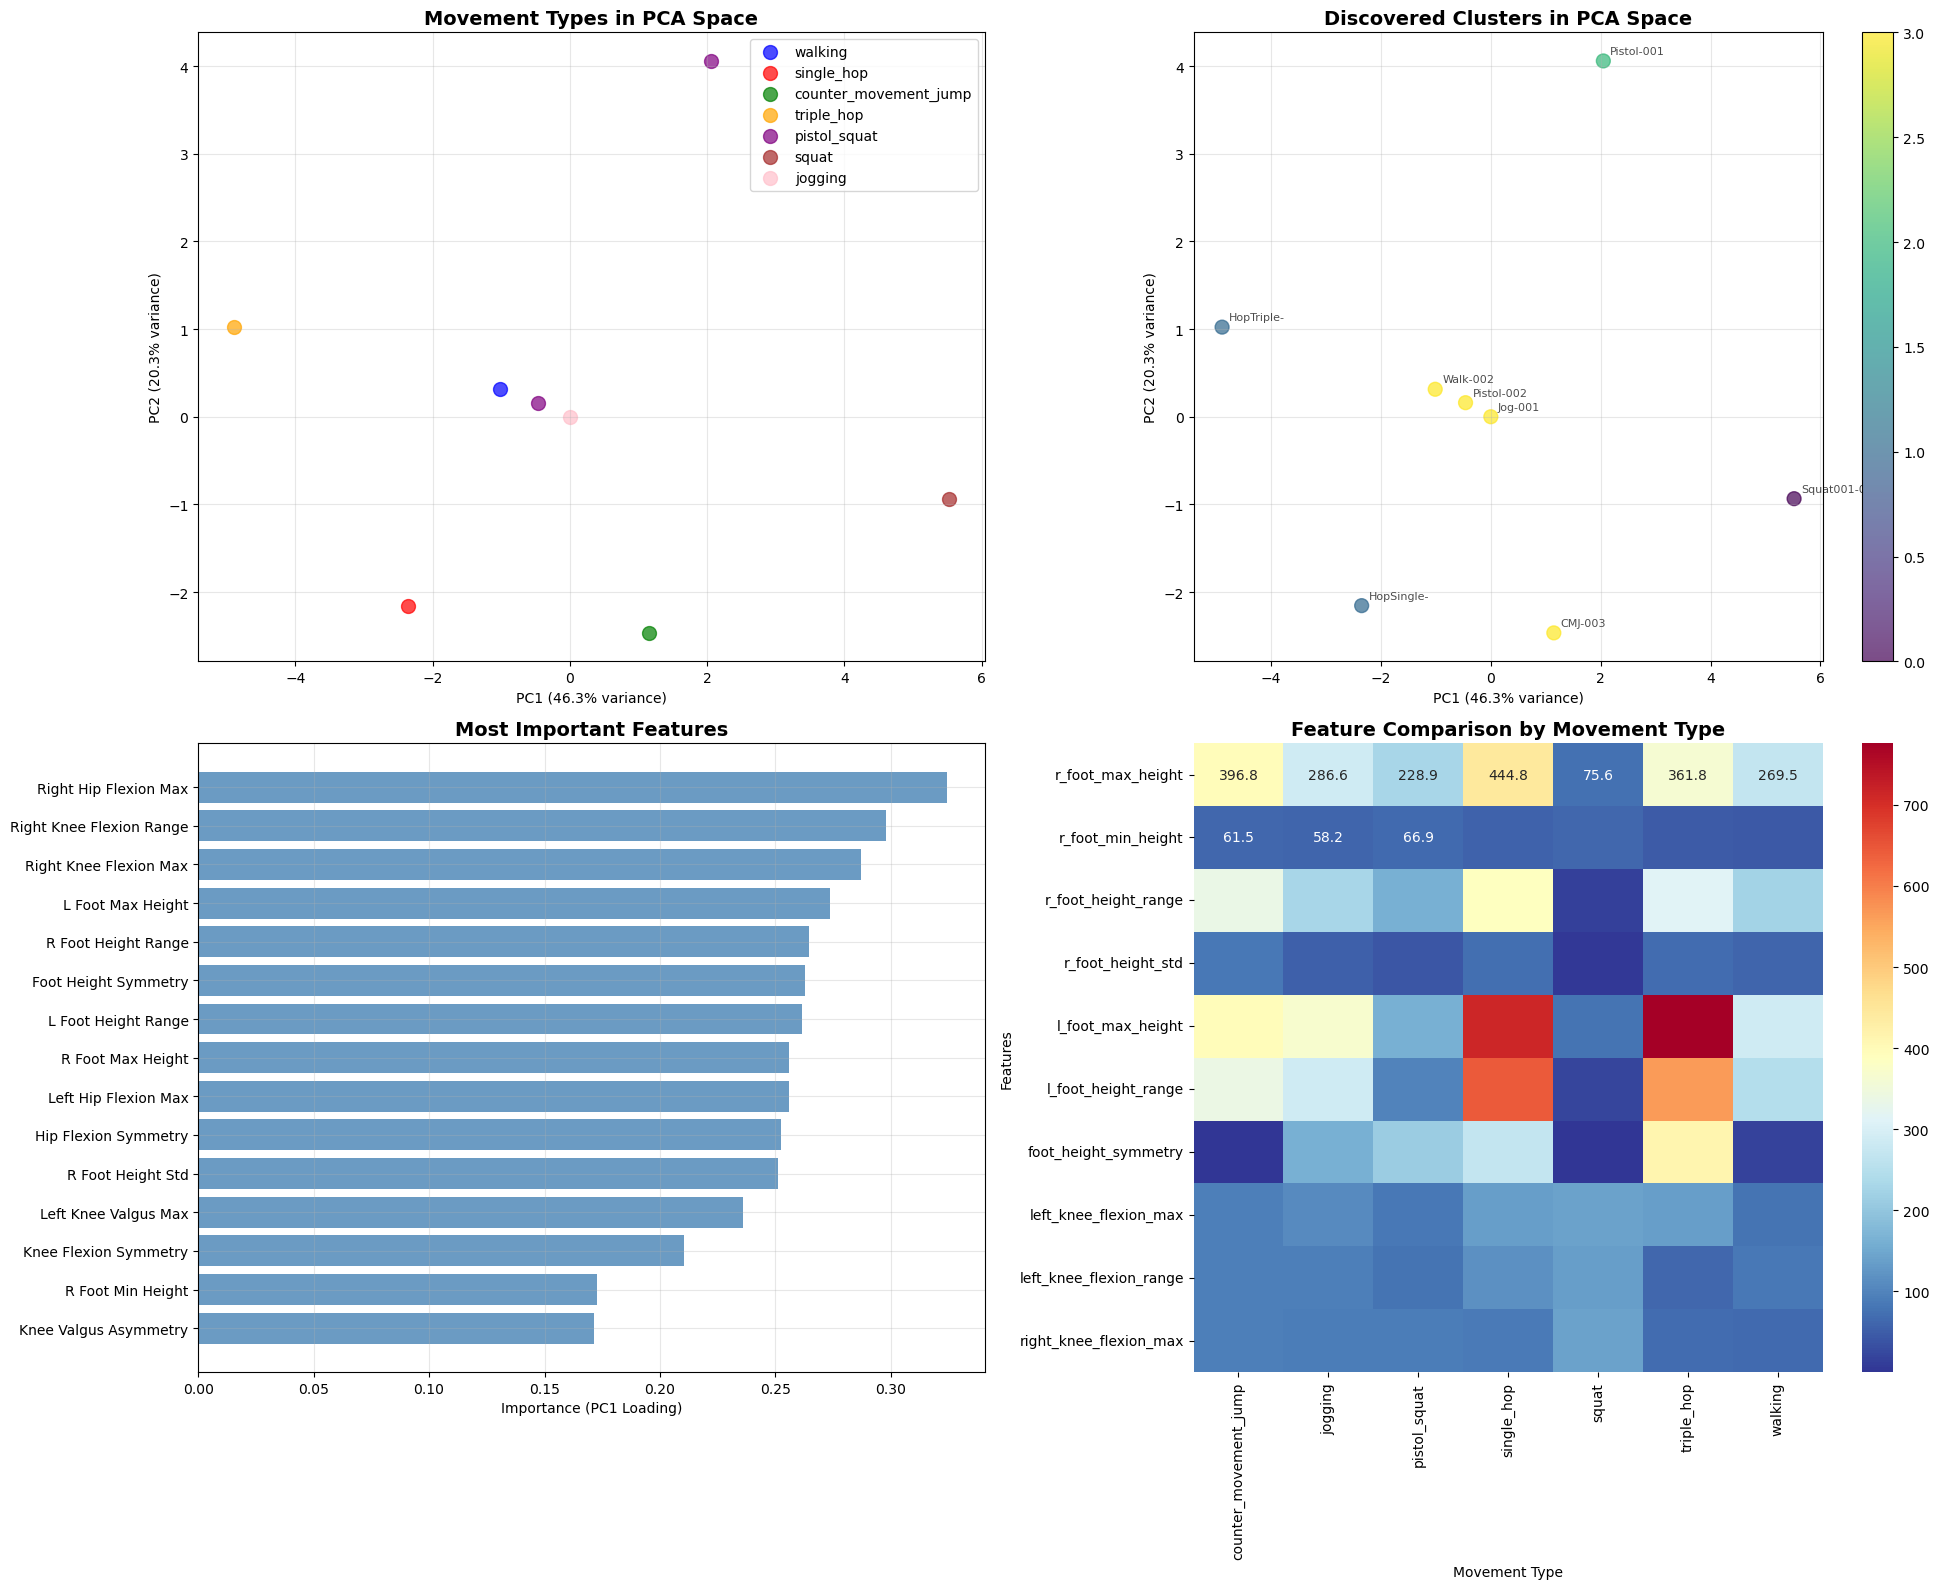


🔍 CLUSTER ANALYSIS

📊 CLUSTER 0:
   Files: ['Squat001-000']
   Movement types: ['squat']
   Top distinguishing features:
     • l_foot_max_height: LOWER (78.1 vs 409.2)
     • l_foot_height_range: LOWER (20.9 vs 325.9)
     • r_foot_height_range: LOWER (14.5 vs 259.0)
     • r_foot_max_height: LOWER (75.6 vs 316.7)
     • foot_height_symmetry: LOWER (2.5 vs 183.8)

📊 CLUSTER 1:
   Files: ['HopSingle-001', 'HopTriple-002']
   Movement types: ['single_hop', 'triple_hop']
   Top distinguishing features:
     • l_foot_max_height: HIGHER (745.0 vs 242.1)
     • l_foot_height_range: HIGHER (605.1 vs 182.0)
     • foot_height_symmetry: HIGHER (341.7 vs 100.9)
     • r_foot_height_range: HIGHER (350.8 vs 187.7)
     • r_foot_max_height: HIGHER (403.3 vs 247.7)

📊 CLUSTER 2:
   Files: ['Pistol-001']
   Movement types: ['pistol_squat']
   Top distinguishing features:
     • r_foot_height_range: LOWER (27.2 vs 257.2)
     • r_foot_max_height: LOWER (89.7 vs 314.7)
     • l_foot_max_height: LOWER

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def extract_features_from_c3d(c3d_data, filename, movement_type):
    """Extract features from a single C3D file (using your existing logic)"""
    
    features = {'filename': filename, 'movement_type': movement_type}
    
    try:
        # Extract rotation/position data
        if 'rotations' in c3d_data['data']:
            rotation_data = c3d_data['data']['rotations']
            labels = c3d_data['parameters']['ROTATION']['LABELS']['value']
            
            # Use your existing matrix extraction code
            matrices_dict = {}
            n_joints = rotation_data.shape[2]
            n_frames = rotation_data.shape[3]
            
            for joint_idx in range(n_joints):
                if joint_idx < len(labels):
                    label = labels[joint_idx]
                    joint_name = label.replace('_4X4', '')
                    joint_matrices = rotation_data[:, :, joint_idx, :].transpose(2, 0, 1)
                    matrices_dict[joint_name] = joint_matrices
            
            # Extract positions
            positions = {}
            for joint_name, matrices in matrices_dict.items():
                positions[joint_name] = matrices[:, :3, 3]
            
            # Extract positional features
            if 'r_foot' in positions:
                r_foot = positions['r_foot'][:, 2]  # Height
                features.update({
                    'r_foot_max_height': np.max(r_foot),
                    'r_foot_min_height': np.min(r_foot),
                    'r_foot_height_range': np.max(r_foot) - np.min(r_foot),
                    'r_foot_height_std': np.std(r_foot),
                })
            
            if 'l_foot' in positions:
                l_foot = positions['l_foot'][:, 2]
                features.update({
                    'l_foot_max_height': np.max(l_foot),
                    'l_foot_height_range': np.max(l_foot) - np.min(l_foot),
                })
            
            # Symmetry
            if 'r_foot' in positions and 'l_foot' in positions:
                features['foot_height_symmetry'] = abs(features['r_foot_max_height'] - features['l_foot_max_height'])
        
        # Extract angle data
        if 'points' in c3d_data['data']:
            points_data = c3d_data['data']['points']
            point_labels = c3d_data['parameters']['POINT']['LABELS']['value']
            
            # Find angle indices (your existing logic)
            try:
                left_knee_idx = point_labels.index('LeftKneeAngles_Theia')
                right_knee_idx = point_labels.index('RightKneeAngles_Theia')
                left_hip_idx = point_labels.index('LeftHipAngles_Theia')
                right_hip_idx = point_labels.index('RightHipAngles_Theia')
                
                # Extract angles
                left_knee_flexion = -points_data[0, left_knee_idx, :]
                right_knee_flexion = points_data[0, right_knee_idx, :]
                left_hip_flexion = points_data[0, left_hip_idx, :]
                right_hip_flexion = points_data[0, right_hip_idx, :]
                
                left_knee_valgus = -points_data[1, left_knee_idx, :]
                right_knee_valgus = points_data[1, right_knee_idx, :]
                
                # Angle features
                features.update({
                    'left_knee_flexion_max': np.max(left_knee_flexion),
                    'left_knee_flexion_range': np.max(left_knee_flexion) - np.min(left_knee_flexion),
                    'right_knee_flexion_max': np.max(right_knee_flexion),
                    'right_knee_flexion_range': np.max(right_knee_flexion) - np.min(right_knee_flexion),
                    
                    'left_hip_flexion_max': np.max(left_hip_flexion),
                    'right_hip_flexion_max': np.max(right_hip_flexion),
                    
                    'left_knee_valgus_max': np.max(np.abs(left_knee_valgus)),
                    'right_knee_valgus_max': np.max(np.abs(right_knee_valgus)),
                    
                    # Symmetries
                    'knee_flexion_symmetry': abs(np.max(left_knee_flexion) - np.max(right_knee_flexion)),
                    'hip_flexion_symmetry': abs(np.max(left_hip_flexion) - np.max(right_hip_flexion)),
                    'knee_valgus_asymmetry': abs(np.max(np.abs(left_knee_valgus)) - np.max(np.abs(right_knee_valgus))),
                })
                
            except ValueError as e:
                print(f"   ⚠️  Some angle data missing in {filename}")
    
    except Exception as e:
        print(f"   ❌ Error extracting features from {filename}: {e}")
    
    return features

def process_all_files():
    """Process all your loaded C3D files"""
    
    print("🚀 PROCESSING ALL C3D FILES")
    print("="*50)
    
    # Define your files with movement types
    files_to_process = [
        (walk_2, "Walk-002", "walking"),
        (hop_single, "HopSingle-001", "single_hop"),
        (cmj_3, "CMJ-003", "counter_movement_jump"),
        (triple_hop_2, "HopTriple-002", "triple_hop"),
        (pistol_1, "Pistol-001", "pistol_squat"),
        (pistol_2, "Pistol-002", "pistol_squat"),
        (squat_2, "Squat001-000", "squat"),
        (jog, "Jog-001", "jogging")
    ]
    
    all_features = []
    
    for c3d_data, filename, movement_type in files_to_process:
        print(f"Processing {filename} ({movement_type})")
        features = extract_features_from_c3d(c3d_data, filename, movement_type)
        all_features.append(features)
        print(f"Extracted {len([k for k in features.keys() if k not in ['filename', 'movement_type']])} features")
    
    # Convert to DataFrame
    df = pd.DataFrame(all_features)
    
    # Fill missing values
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    
    print(f"COMPLETE! Created dataset with {len(df)} samples and {len(numeric_columns)} features")
    print(f"Movement types: {df['movement_type'].value_counts().to_dict()}")
    
    return df

def run_unsupervised_analysis(df):
    """Run unsupervised learning on the combined dataset"""
    
    print("RUNNING UNSUPERVISED ANALYSIS")
    print("="*40)
    
    # Prepare data
    feature_columns = [col for col in df.columns if col not in ['filename', 'movement_type']]
    X = df[feature_columns].values
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # Clustering
    n_clusters = min(4, len(df))  # Max 4 clusters or number of samples
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Add results to dataframe
    df['cluster'] = clusters
    df['pc1'] = X_pca[:, 0]
    df['pc2'] = X_pca[:, 1]
    
    print(f"✅ Found {n_clusters} movement clusters")
    
    return df, X_scaled, pca, kmeans, feature_columns

def create_visualizations(df, pca, feature_columns):
    """Create comprehensive visualizations"""
    
    print("\n📊 CREATING VISUALIZATIONS...")
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
    
    # 1. PCA Plot colored by movement type
    movement_colors = {'walking': 'blue', 'single_hop': 'red', 'counter_movement_jump': 'green', 
                      'triple_hop': 'orange', 'pistol_squat': 'purple', 'squat': 'brown', 'jogging': 'pink'}
    
    for movement in df['movement_type'].unique():
        mask = df['movement_type'] == movement
        ax1.scatter(df.loc[mask, 'pc1'], df.loc[mask, 'pc2'], 
                   c=movement_colors.get(movement, 'gray'), 
                   label=movement, s=100, alpha=0.7)
    
    ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    ax1.set_title('Movement Types in PCA Space', fontweight='bold', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. PCA Plot colored by cluster
    scatter = ax2.scatter(df['pc1'], df['pc2'], c=df['cluster'], cmap='viridis', s=100, alpha=0.7)
    ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
    ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
    ax2.set_title('Discovered Clusters in PCA Space', fontweight='bold', fontsize=14)
    plt.colorbar(scatter, ax=ax2)
    ax2.grid(True, alpha=0.3)
    
    # Add filename labels
    for i, row in df.iterrows():
        ax2.annotate(row['filename'][:10], (row['pc1'], row['pc2']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)
    
    # 3. Feature importance (PCA loadings)
    n_features_to_show = min(15, len(feature_columns))
    feature_importance = np.abs(pca.components_[0, :])  # First PC
    top_indices = np.argsort(feature_importance)[-n_features_to_show:]
    
    top_features = [feature_columns[i] for i in top_indices]
    top_importances = feature_importance[top_indices]
    
    ax3.barh(range(len(top_features)), top_importances, alpha=0.8, color='steelblue')
    ax3.set_yticks(range(len(top_features)))
    ax3.set_yticklabels([f.replace('_', ' ').title() for f in top_features], fontsize=10)
    ax3.set_xlabel('Importance (PC1 Loading)')
    ax3.set_title('Most Important Features', fontweight='bold', fontsize=14)
    ax3.grid(True, alpha=0.3)
    
    # 4. Movement comparison heatmap
    numeric_cols = [col for col in feature_columns if col in df.columns][:10]  # Top 10 features
    movement_means = df.groupby('movement_type')[numeric_cols].mean()
    
    sns.heatmap(movement_means.T, annot=True, fmt='.1f', ax=ax4, cmap='RdYlBu_r')
    ax4.set_title('Feature Comparison by Movement Type', fontweight='bold', fontsize=14)
    ax4.set_xlabel('Movement Type')
    ax4.set_ylabel('Features')
    
    plt.tight_layout()
    plt.show()
    
    return top_features

def analyze_clusters(df):
    """Analyze what each cluster represents"""
    
    print("\n🔍 CLUSTER ANALYSIS")
    print("="*30)
    
    for cluster_id in sorted(df['cluster'].unique()):
        cluster_data = df[df['cluster'] == cluster_id]
        print(f"\n📊 CLUSTER {cluster_id}:")
        print(f"   Files: {list(cluster_data['filename'])}")
        print(f"   Movement types: {list(cluster_data['movement_type'])}")
        
        # Find distinguishing features
        other_clusters = df[df['cluster'] != cluster_id]
        feature_cols = [col for col in df.columns if col not in ['filename', 'movement_type', 'cluster', 'pc1', 'pc2']]
        
        distinguishing_features = []
        for feature in feature_cols:
            if feature in cluster_data.columns and feature in other_clusters.columns:
                cluster_mean = cluster_data[feature].mean()
                other_mean = other_clusters[feature].mean()
                difference = abs(cluster_mean - other_mean)
                if difference > 0.5:  # Arbitrary threshold
                    distinguishing_features.append((feature, cluster_mean, other_mean, difference))
        
        distinguishing_features.sort(key=lambda x: x[3], reverse=True)
        
        print("   Top distinguishing features:")
        for feature, cluster_mean, other_mean, diff in distinguishing_features[:5]:
            direction = "HIGHER" if cluster_mean > other_mean else "LOWER"
            print(f"     • {feature}: {direction} ({cluster_mean:.1f} vs {other_mean:.1f})")

# RUN THE COMPLETE ANALYSIS
print("🎯 STARTING COMPREHENSIVE ANALYSIS OF ALL FILES")
print("="*60)

# Step 1: Process all files
df = process_all_files()

# Step 2: Run unsupervised analysis
df_analyzed, X_scaled, pca, kmeans, feature_columns = run_unsupervised_analysis(df)

# Step 3: Create visualizations
top_features = create_visualizations(df_analyzed, pca, feature_columns)

# Step 4: Analyze clusters
analyze_clusters(df_analyzed)

# Step 5: Summary
print(f"\n🎉 ANALYSIS COMPLETE!")
print(f"✅ Processed {len(df)} movement files")
print(f"✅ Extracted {len(feature_columns)} biomechanical features")
print(f"✅ Identified {len(df['cluster'].unique())} movement pattern clusters")
print(f"✅ Top distinguishing features: {top_features[:5]}")

# Show the final dataframe
print(f"\n📋 FINAL DATASET PREVIEW:")
print(df_analyzed[['filename', 'movement_type', 'cluster'] + top_features[:3]].round(2))